# Проект "Стримчик" #


**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Исследование пройдёт в **пять этапов**:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Описание портрета пользователя.
- Проверка гипотез.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив информацию о таблице, можно отметить, что имеются столбцы с пропусками значений. Далее можно подробнее посмотреть насколько много пропусков и в каких именно столбцах:

In [4]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Построим гистограммы для каждого из столбцов, чтобы предварительно оценить диапазон значений в них и имеющееся распределение:

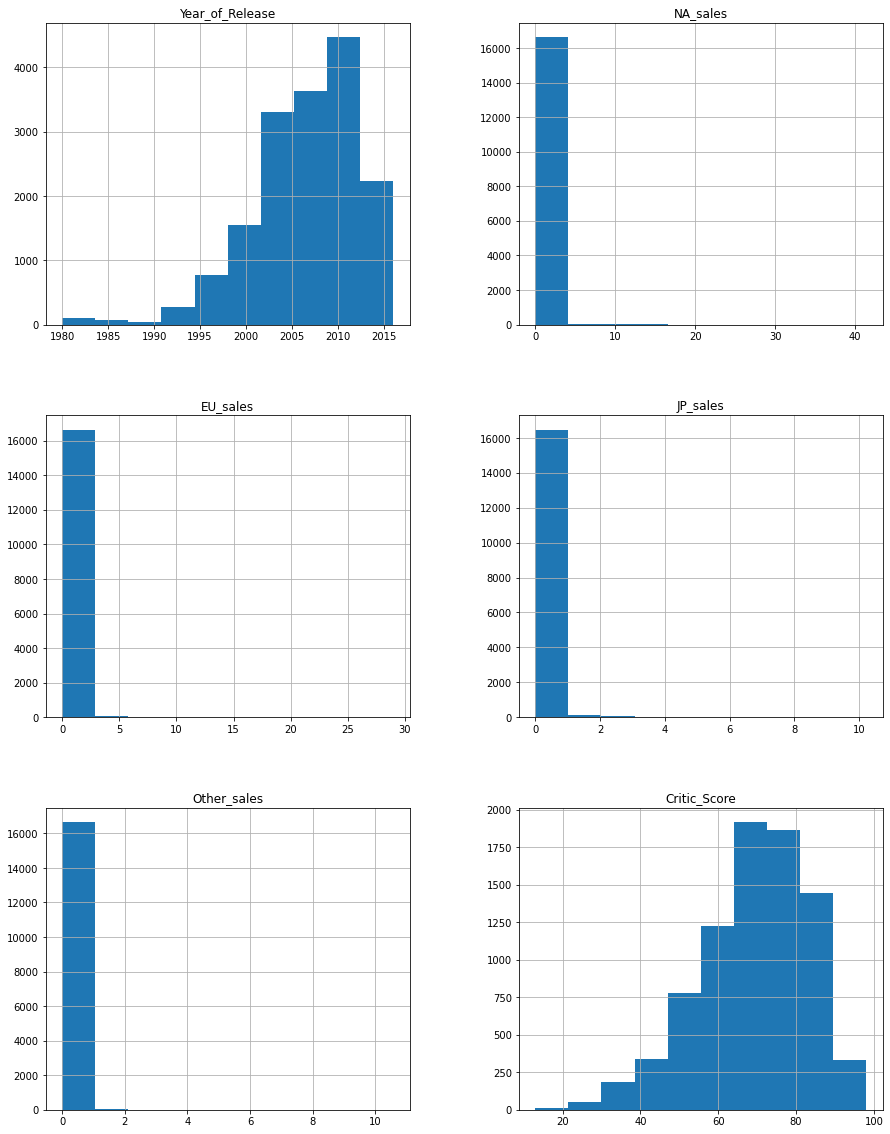

In [5]:
data.hist(figsize=(15, 20));

Глядя на графики по каждому из столбцов, можно сказать, что данные по году выпуска игр и оценкам критиков распределены нормально, со скошенностью вправо. Это значит, что медианное значение по данным столбцам будет меньше среднего. 
    Данные по продажам имеют редкие, но сильно выдающиеся выбросы, поэтому основная масса сгруппирована в один диапазон, что малоинформативно для анализа, нужно еще поработать с этими столбцами. 
    Также следует перевести некоторые столбцы из типа object в числовые типы, т.к. гистограмма по ним не строится. Проведем эту работу в следующем шаге.

### Шаг:  Подготовьте данные ###

Для начала приведем названия столбцов к нижнему регистру, чтобы было удобнее с ними работать.

In [6]:
data.columns = data.columns.str.lower() 

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем данные в нужные типы.

In [8]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец с оценками пользователей лучше перевести в числовой тип, чтобы в дальнейшем было удобно применять к нему различные методы. В столбце имеются значения с аббревиатурой 'tbd'(используется, если какая-то информация еще не определена или решение по вопросу не принято), заменим их на NaN, т.к. иначе метод выдает ошибку.

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce') 

Столбец с годами выпуска переведем в целочисленный формат, чтобы было более наглядное отображение данных.

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Также проверили таблицу на наличие явных дубликатых. Их количество = 0.

In [12]:
data.duplicated().sum()

0

Касаемо пропусков, по столбцам год выпуска, оценка критиков, оценка пользователей - эти пропуски мы заполнять не будем, так как точно их заполнить не получится, а удалять все строки с пропусками по этому столбцу не стоит, так как потеряем другую инфрмацию из строк.

In [13]:
data.isnull().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах name и genre находятся по 2 пропущенных значения, проверим находятся ли они в одной и той же строке и удалим, т.к. эти строки составляют всего 0,01% от всех данных и на результаты анализа не повлияют.

In [14]:
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data = data.dropna(subset=['genre'])

In [16]:
display(data[data['genre'].isna()]) #проверяем, что строки удалены

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбце rating содержится рейтинг от организации ESRB, которая присваивает компьютерным играм подходящую возрастную категорию. В данном столбце имеется достаточно большое количество пропусков (6766), возможно, они возникли из-за того, что не во всех регионах используется именно эта американская система оценки возрастной цензуры. Чтобы иметь полную информацию, в будущем можно порекомендовать рассматривать рейтинги и от других организаций, например европейская PEGI, японская CERO. 
    
   Чтобы не искажать данные и не додумывать возможные пропущенные значения, проставим в строках с пропусками значение 'undefined'. В дальнейшем проанализируем категорию с рейтингом 'undefined' отдельно.

In [17]:
data['rating'] = data['rating'].fillna('undefined')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец 'total_sales'.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Шаг: Проведите исследовательский анализ данных ###

Посмотрим, сколько игр выпускалось в разные годы. 

In [19]:
display(data['year_of_release'].min(), data['year_of_release'].max())

1980

2016

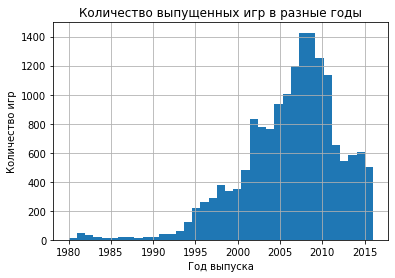

In [20]:
data['year_of_release'].hist(bins=37);
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр в разные годы');

Судя по гистограмме, до 2000 года выпускалось очень малое количество игр, можем отбросить эти значения для данного исследования, т.к. они для нас малоинформативны и неактуальны.

Посмотрим, как менялись продажи по платформам.

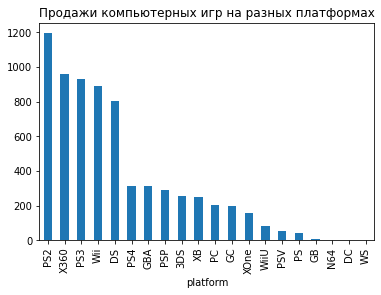

In [21]:
(data
    .query('year_of_release > 2000')
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(x='platform', y='total_sales', kind='bar')
);
plt.title('Продажи компьютерных игр на разных платформах');

На данном графике мы видим, что имеются 5 столбцов с наибольшими суммарными продажами, остальные платформы сильно оторваны по значениям. Посмотрим какие именно это платформы.

In [22]:
top_platform = data.query('year_of_release > 2000').groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
top_platform  #выбираем платформы с наибольшими суммарными продажами

platform
PS2     1194.39
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

Далее построим распределение по годам, чтобы понять за какой характерный срок появляются новые и исчезают старые платформы. Будем рассматривать только платформы с наибольшими суммарными продажами.

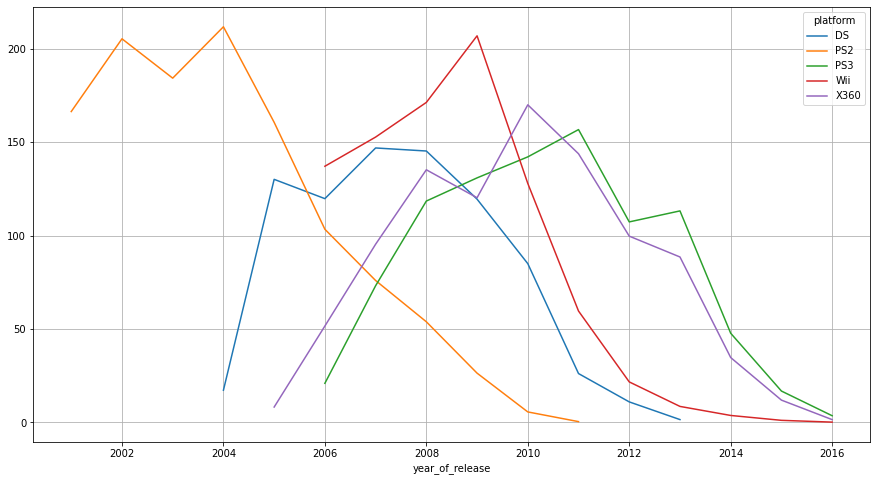

In [23]:
(data
    .query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]')
    .query('year_of_release > 2000')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15,8))
);

При рассмотрении характерных сроков появления и исчезновения платформ с наибольшими суммарными продажами, можно сделать вывод, что этот срок в среднем составляет около 10 лет. Тогда логичнее рассмотреть именно последние 10 лет, как наиболее актуальные данные.

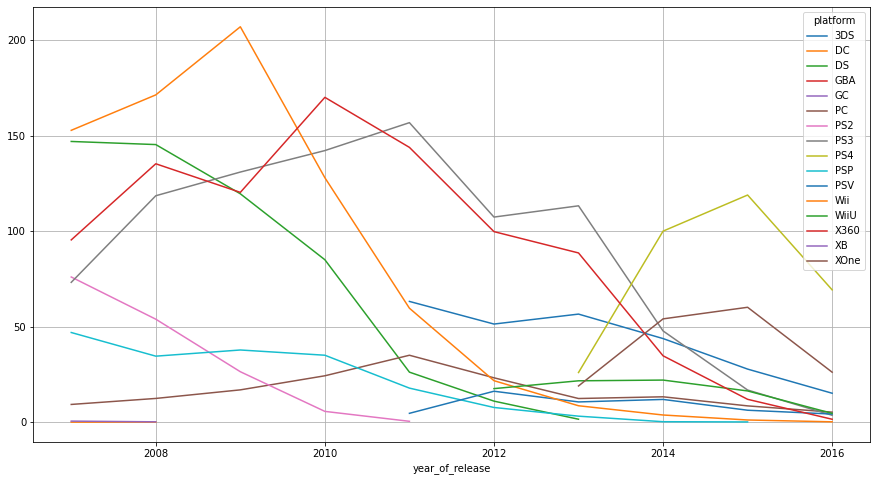

In [24]:
(data
    .query('year_of_release > 2006')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15,8))
);

Если рассмотреть как менялись продажи по всем платформам, то мы видим, что к 2014 году все старые лидеры продаж уже практически ушли с рынка. Зато появилось 2 новые платформы PS4 и XOne, которые, видимо, и будут делить рынок в интересующем нас периоде.

Таким образом, в качестве актуального для исследования периода, будем считать 2014-2016 года, именно эти данные помогут построить наиболее корректный прогноз на 2017 год.

In [25]:
data_actual = data.query('year_of_release >= 2014')
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


После того, как мы отбросили неактуальные для исследования данные, осталось 1689 строк, именно с ними будем работать в дальнейшем.

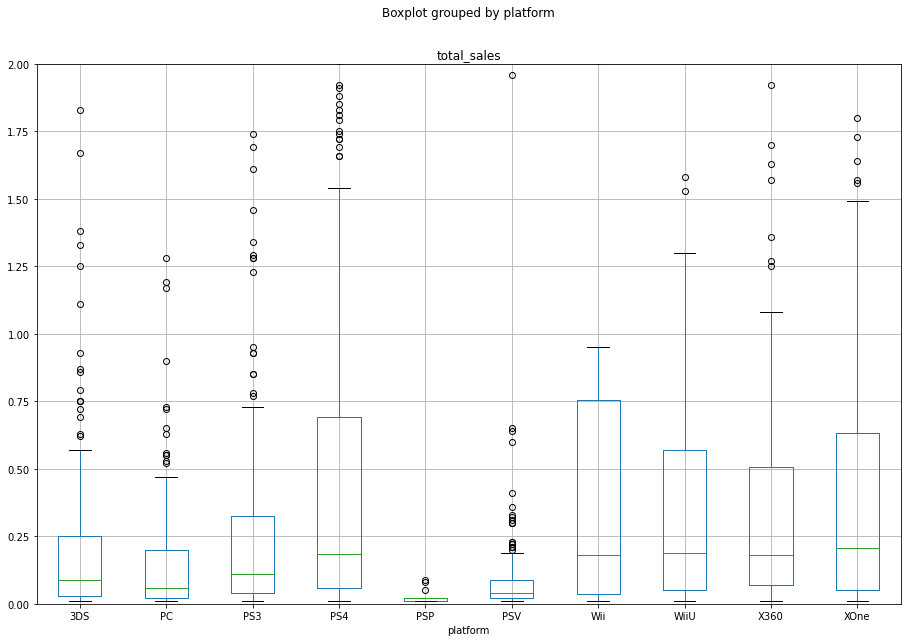

In [26]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(15,10));
plt.ylim(0, 2)
plt.show()

В результате построения графика «ящик с усами» по глобальным продажам игр в разбивке по платформам можно отметить следующее:
- 2 лидирующие платформы PS4 и XOne имеют схожие параметры: ориентировочная граница нормального размаха приблизительно 1,5 млн. проданных копий. Всё, что лежит за ней, считается выбросом. Таких выбросов достаточно много, особенно у платформы  PS4, это значит, что по каким-то играм на этой платформе были высокие продажи, но всё же значения, которые отсёк верхний «ус», — редкие;
- медианы у лидирующих платформ также близки по значению - около 0,2 млн. проданных копий, это усредненное значение для продаж игр по этим платформам;
- также стоит отметить платформу WiiU с медианой и границей нормального размаха близкими к лидерам, но у нее совсем мало "выбросов" в сторону более высоких продаж;
- наименее прибыльной платформой в данном периоде является PSP, у которой средние значения продаж близки к 0.

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

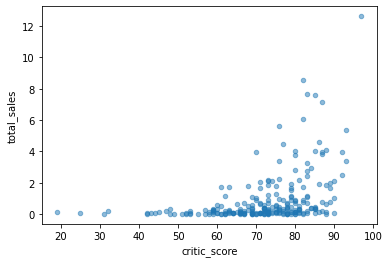

In [27]:
data_actual_ps4 = data_actual.query('platform == "PS4"')
data_actual_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);

In [28]:
data_actual_ps4['critic_score'].corr(data_actual_ps4['total_sales'])

0.40266141068104083

Линейная связь между продажами игр внутри платформы PS4 и отзывами критиков имеется, но достаточно слабая. Она положительная, т.е. при росте оценок критиков продажи растут, но так бывает не всегда.

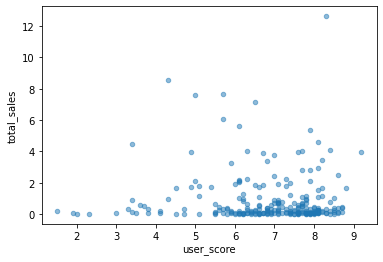

In [29]:
data_actual_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5);

In [30]:
data_actual_ps4['user_score'].corr(data_actual_ps4['total_sales'])

-0.040131589472697356

Линейная связь между оценками пользователей и продажами игр внутри платформы PS4 практически отсутствует. То есть, можно сказать, что покупатели либо не читают отзывы на игры, либо не принимают на их основе решения о покупке той или иной игры.

Для того, чтобы подтвердить свои выводы далее проанализируем влияние оценок пользователей и критиков по остальным лидирующим платформам.

In [31]:
top_platform_actual= data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
top_platform_actual # взглянем на топ-5 платформ в актуальном периоде

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

In [32]:
data_actual_XOne = data_actual.query('platform == "XOne"')
data_actual_3DS = data_actual.query('platform == "3DS"')
data_actual_PS3 = data_actual.query('platform == "PS3"')
data_actual_X360 = data_actual.query('platform == "X360"')

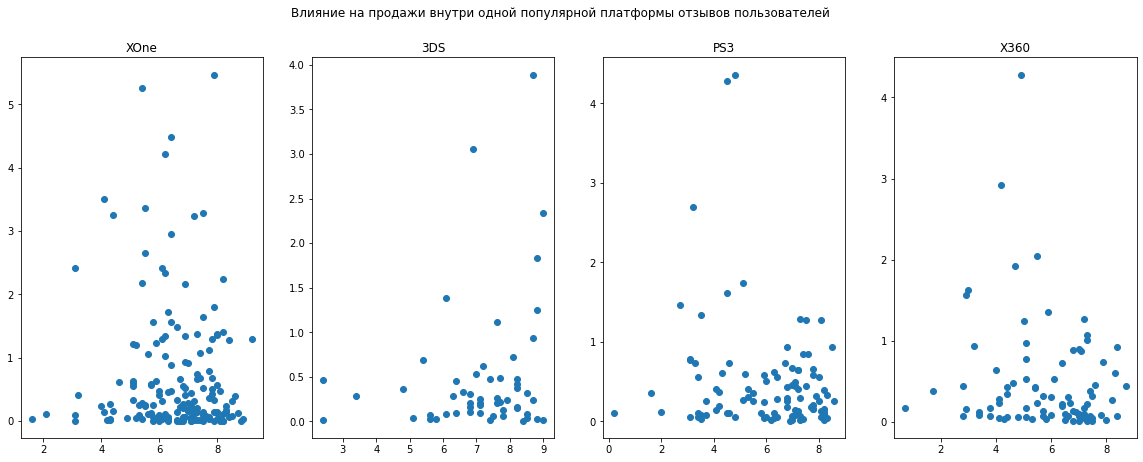

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(20, 7));
axs[0].scatter(data_actual_XOne['user_score'], data_actual_XOne['total_sales']);
axs[1].scatter(data_actual_3DS['user_score'], data_actual_3DS['total_sales']);
axs[2].scatter(data_actual_PS3['user_score'], data_actual_PS3['total_sales']);
axs[3].scatter(data_actual_X360['user_score'], data_actual_X360['total_sales']);
fig.suptitle('Влияние на продажи внутри одной популярной платформы отзывов пользователей');
axs[0].set_title('XOne');
axs[1].set_title('3DS');
axs[2].set_title('PS3');
axs[3].set_title('X360');

In [34]:
data_actual_XOne['user_score'].corr(data_actual_XOne['total_sales'])

-0.0703839280647581

In [35]:
data_actual_XOne['user_score'].corr(data_actual_XOne['total_sales'])

-0.0703839280647581

In [36]:
data_actual_PS3['user_score'].corr(data_actual_PS3['total_sales'])

-0.16676141347662118

In [37]:
data_actual_X360['user_score'].corr(data_actual_X360['total_sales'])

-0.138444570945665

Продажи игр внутри других топовых платформ также, как и у платформы PS4 не имеют зависимости от отзывов пользователей. Их линейная связь отрицательна, но она настолько слаба, что на неё не стоит ориентироваться.

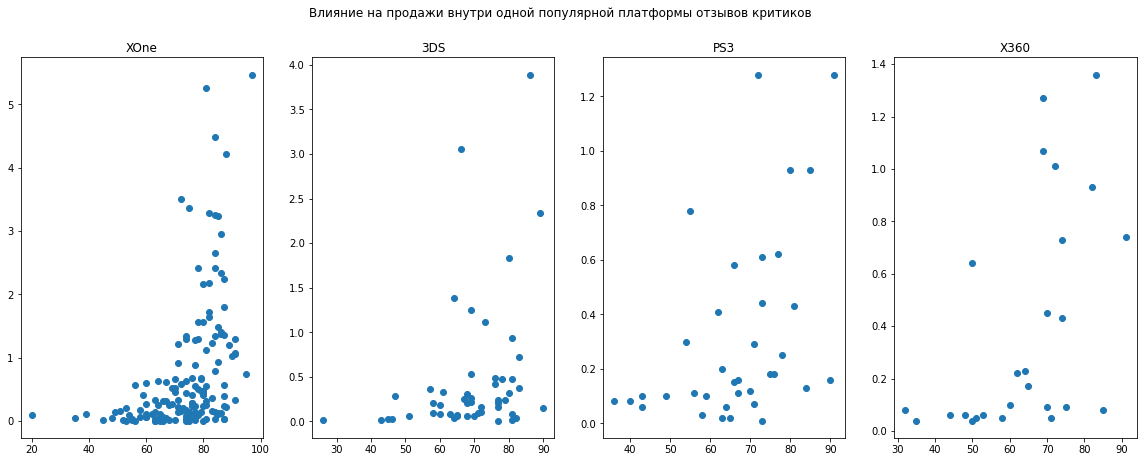

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(20, 7));
axs[0].scatter(data_actual_XOne['critic_score'], data_actual_XOne['total_sales']);
axs[1].scatter(data_actual_3DS['critic_score'], data_actual_3DS['total_sales']);
axs[2].scatter(data_actual_PS3['critic_score'], data_actual_PS3['total_sales']);
axs[3].scatter(data_actual_X360['critic_score'], data_actual_X360['total_sales']);
fig.suptitle('Влияние на продажи внутри одной популярной платформы отзывов критиков');
axs[0].set_title('XOne');
axs[1].set_title('3DS');
axs[2].set_title('PS3');
axs[3].set_title('X360');

In [39]:
data_actual_XOne['critic_score'].corr(data_actual_XOne['total_sales'])

0.42867694370333226

In [40]:
data_actual_3DS['critic_score'].corr(data_actual_3DS['total_sales'])

0.314117492869051

In [41]:
data_actual_PS3['critic_score'].corr(data_actual_PS3['total_sales'])

0.44657460493190704

In [42]:
data_actual_X360['critic_score'].corr(data_actual_X360['total_sales'])

0.5257228356581523

   По продажам игр внутри топовых платформ, как по PS4, наблюдается похожая связь с отзывами критиков. Она положительная, т.е. при росте оценок критиков продажи тоже растут, но достаточно слабо.
   

Далее посмотрим на общее распределение игр по жанрам.

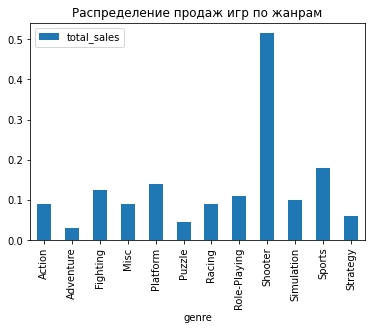

In [43]:
(data_actual
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .plot(kind='bar')
);
plt.title ('Распределение продаж игр по жанрам');

Самым прибыльным жанром компьютерных игр является Shooter, его медианные продажи в 2 раза превышают продажи следующего по популярности жанра компбютерных игр - Sports. 
Наименее прибыльные жанры - это Adventure и Puzzle, у них очень низкие продажи, по сравнению с остальными жанрами.

### Шаг: Составьте портрет пользователя каждого региона ###

- Самые популярные платформы (топ-5) для пользователя каждого региона. Опишите различия в долях продаж.

In [44]:
platform_group_na = (data_actual
    .groupby('platform')
    .agg({'na_sales':'sum'})
)
platform_group_na.columns=['na_sum']
platform_group_na = platform_group_na.sort_values(by='na_sum', ascending=False).head(5)
platform_group_na['ratio'] = 100*platform_group_na['na_sum']/(platform_group_na['na_sum'].sum())

platform_group_na = np.round(platform_group_na)

In [45]:
platform_group_eu = (data_actual
    .groupby('platform')
    .agg({'eu_sales':'sum'})
)
platform_group_eu.columns=['eu_sum']
platform_group_eu = platform_group_eu.sort_values(by='eu_sum', ascending=False).head(5)
platform_group_eu['ratio'] = 100*platform_group_eu['eu_sum']/(platform_group_eu['eu_sum'].sum())

platform_group_eu = np.round(platform_group_eu)

In [46]:
platform_group_jp = (data_actual
    .groupby('platform')
    .agg({'jp_sales':'sum'})
)
platform_group_jp.columns=['jp_sum']
platform_group_jp = platform_group_jp.sort_values(by='jp_sum', ascending=False).head(5)
platform_group_jp['ratio'] = 100*platform_group_jp['jp_sum']/(platform_group_jp['jp_sum'].sum())

platform_group_jp = np.round(platform_group_jp)

In [47]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [48]:
display(platform_group_na, platform_group_eu, platform_group_jp)

,na_sum,ratio
platform,,
PS4,99.0,39.0
XOne,81.0,32.0
X360,28.0,11.0
3DS,23.0,9.0
PS3,22.0,9.0


,eu_sum,ratio
platform,,
PS4,130.0,55.0
XOne,46.0,20.0
PS3,26.0,11.0
PC,18.0,8.0
3DS,16.0,7.0


,jp_sum,ratio
platform,,
3DS,44.0,48.0
PS4,15.0,16.0
PSV,15.0,16.0
PS3,11.0,12.0
WiiU,7.0,8.0


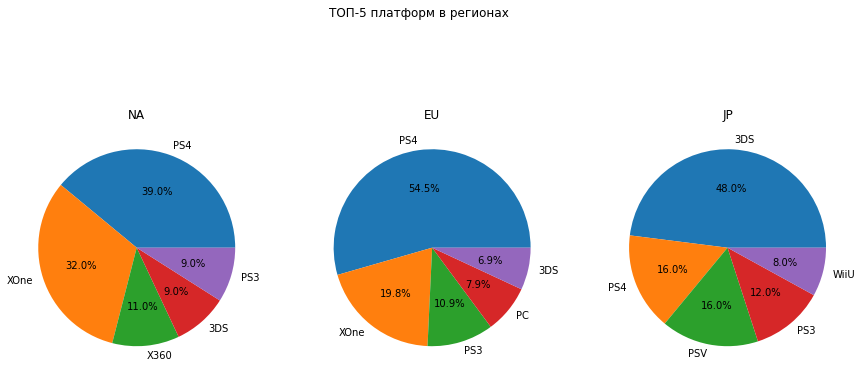

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7));
axs[0].pie(platform_group_na['ratio'], labels=['PS4', 'XOne', 'X360', '3DS', 'PS3'], autopct='%1.1f%%');
axs[1].pie(platform_group_eu['ratio'], labels=['PS4', 'XOne', 'PS3', 'PC', '3DS'], autopct='%1.1f%%');
axs[2].pie(platform_group_jp['ratio'], labels=['3DS', 'PS4', 'PSV', 'PS3', 'WiiU'], autopct='%1.1f%%');
fig.suptitle('ТОП-5 платформ в регионах');
axs[0].set_title('NA');
axs[1].set_title('EU');
axs[2].set_title('JP');

На американском рынке лидерами продаж среди платформ выступили PS4 и XOne, доля продаж игр на этих платформах составила 39% и 32% соответственно. Далее со значительным отставанием в продажах идут платформы X360, 3DS и PS3, доли продаж игр на таких платформах составляют 11% и менее от общей суммы продаж за выбранный период.

В Европе, в отличии от Америки, среди платформ лидирует всего одна - PS4, продажи игр на ней занимают более половины продаж по всем платформам (55%). Остальные популярные платформы из Топ-5 платформ(XOne, PS3, PC, 3DS) имеют долю продаж 20% и меньше.

Японский рынок значительно отличается от Америки и Европы, здесь лидирующую позицию занимает одна платформа - 3DS, доля продаж игр на этой платформе составяет почти 48%. Остальные платформы (PS4, PSV, PS3, WiiU) идут в сильном отрыве от лидера, по ним доля продаж составляет 16% и меньше.

- Самые популярные жанры (топ-5) для пользователя каждого региона. Поясните разницу.

In [50]:
genre_group_na = (data_actual
    .groupby('genre')
    .agg({'na_sales':'sum'})
)
genre_group_na.columns=['na_sum']
genre_group_na = genre_group_na.sort_values(by='na_sum', ascending=False).head(5)
genre_group_na['ratio'] = 100*genre_group_na['na_sum']/(genre_group_na['na_sum'].sum())

genre_group_na = np.round(genre_group_na)

In [51]:
genre_group_eu = (data_actual
    .groupby('genre')
    .agg({'eu_sales':'sum'})
)
genre_group_eu.columns=['eu_sum']
genre_group_eu = genre_group_eu.sort_values(by='eu_sum', ascending=False).head(5)
genre_group_eu['ratio'] = 100*genre_group_eu['eu_sum']/(genre_group_eu['eu_sum'].sum())

genre_group_eu = np.round(genre_group_eu)

In [52]:
genre_group_jp = (data_actual
    .groupby('genre')
    .agg({'jp_sales':'sum'})
)
genre_group_jp.columns=['jp_sum']
genre_group_jp = genre_group_jp.sort_values(by='jp_sum', ascending=False).head(5)
genre_group_jp['ratio'] = 100*genre_group_jp['jp_sum']/(genre_group_jp['jp_sum'].sum())

genre_group_jp = np.round(genre_group_jp)

In [53]:
display(genre_group_na, genre_group_eu, genre_group_jp)

,na_sum,ratio
genre,,
Shooter,79.0,32.0
Action,73.0,29.0
Sports,46.0,19.0
Role-Playing,33.0,14.0
Misc,15.0,6.0


,eu_sum,ratio
genre,,
Action,75.0,33.0
Shooter,66.0,29.0
Sports,46.0,20.0
Role-Playing,28.0,12.0
Racing,14.0,6.0


,jp_sum,ratio
genre,,
Role-Playing,31.0,40.0
Action,30.0,38.0
Fighting,6.0,8.0
Misc,6.0,7.0
Shooter,5.0,6.0


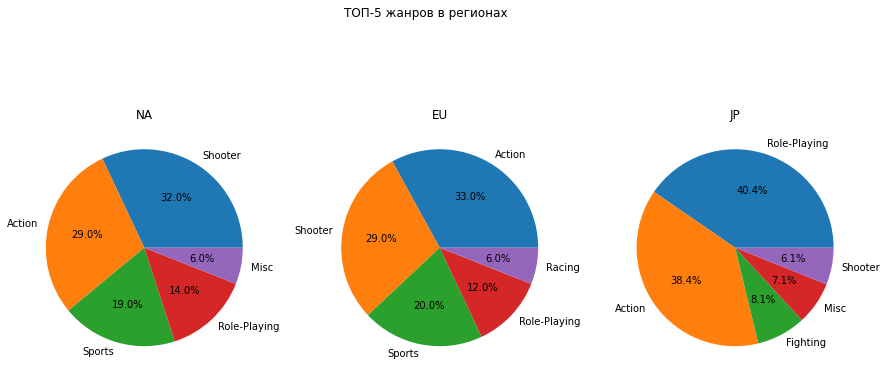

In [54]:
fig, axs = plt.subplots(1,3, figsize=(15,7));
axs[0].pie(genre_group_na['ratio'], labels=['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'], autopct='%1.1f%%');
axs[1].pie(genre_group_eu['ratio'], labels=['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'], autopct='%1.1f%%');
axs[2].pie(genre_group_jp['ratio'], labels=['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter'], autopct='%1.1f%%');
fig.suptitle('ТОП-5 жанров в регионах');
axs[0].set_title('NA');
axs[1].set_title('EU');
axs[2].set_title('JP');

Среди наиболее популярных жанров игр в Северной Америке можно выделить: Shooter, Action и Sports. Доли продаж игр этих жанров составляют 32%, 29% и 19% соответственно. Также достаточно популярны Role-Playing и Misc.

В Европе похожая с Америкой тенденция. Здесь также популярны Action, Shooter и Sports (доли продаж 33%, 29% и 20% соответственно). Также популярность имеют такие жанры, как Role-Playing и Racing.

В Японии, конечно, предпочтения жанров не похожи на американские и европейские. Можно выделить 2 наиболее популярных жанра - Role-Playing и Action (доля продаж игр в таком жанре составляет 40% и 38% соответственно). Жанры Fighting, Misc и Shooter имеют доли продаж от 8% и менее.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
rating_group_na = (data_actual
    .groupby('rating')
    .agg({'na_sales':'sum'})
)
rating_group_na.columns=['na_sum']
rating_group_na = rating_group_na.sort_values(by='na_sum', ascending=False).head(5)
rating_group_na['ratio'] = 100*rating_group_na['na_sum']/(rating_group_na['na_sum'].sum())

rating_group_na = np.round(rating_group_na)

In [56]:
rating_group_eu = (data_actual
    .groupby('rating')
    .agg({'eu_sales':'sum'})
)
rating_group_eu.columns=['eu_sum']
rating_group_eu = rating_group_eu.sort_values(by='eu_sum', ascending=False).head(5)
rating_group_eu['ratio'] = 100*rating_group_eu['eu_sum']/(rating_group_eu['eu_sum'].sum())

rating_group_eu = np.round(rating_group_eu)

In [57]:
rating_group_jp = (data_actual
    .groupby('rating')
    .agg({'jp_sales':'sum'})
)
rating_group_jp.columns=['jp_sum']
rating_group_jp = rating_group_jp.sort_values(by='jp_sum', ascending=False).head(5)
rating_group_jp['ratio'] = 100*rating_group_jp['jp_sum']/(rating_group_jp['jp_sum'].sum())

rating_group_jp = np.round(rating_group_jp)

In [58]:
display(rating_group_na, rating_group_eu, rating_group_jp)

,na_sum,ratio
rating,,
M,96.0,34.0
undefined,65.0,23.0
E,51.0,18.0
T,39.0,14.0
E10+,33.0,12.0


,eu_sum,ratio
rating,,
M,93.0,35.0
undefined,59.0,22.0
E,58.0,21.0
T,34.0,13.0
E10+,26.0,10.0


,jp_sum,ratio
rating,,
undefined,57.0,61.0
T,15.0,16.0
E,9.0,10.0
M,8.0,9.0
E10+,4.0,5.0


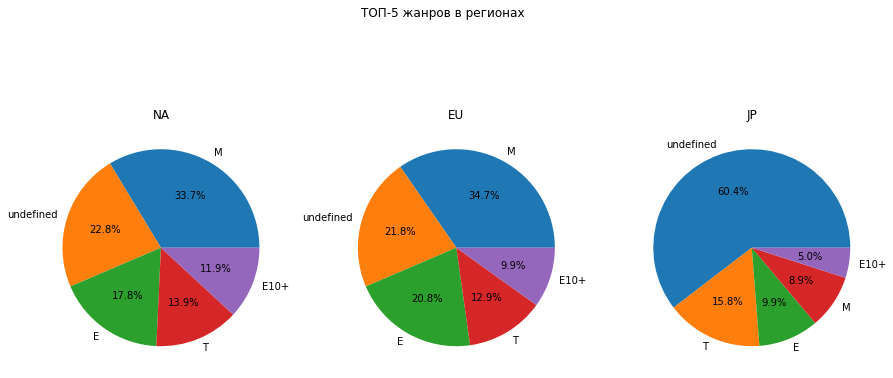

In [59]:
fig, axs = plt.subplots(1,3, figsize=(15,7));
axs[0].pie(rating_group_na['ratio'], labels=['M', 'undefined', 'E', 'T', 'E10+'], autopct='%1.1f%%');
axs[1].pie(rating_group_eu['ratio'], labels=['M', 'undefined', 'E', 'T', 'E10+'], autopct='%1.1f%%');
axs[2].pie(rating_group_jp['ratio'], labels=['undefined', 'T', 'E', 'M', 'E10+'], autopct='%1.1f%%');
fig.suptitle('ТОП-5 жанров в регионах');
axs[0].set_title('NA');
axs[1].set_title('EU');
axs[2].set_title('JP');

 На американском рынке наиболее востребованны игры с рейтингом "M" («Mature») — «От 17 лет». Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
Такие игры имеют 34% продаж от всех игр в регионе. 

Во вторую категорию попадают игры с не определенным рейтингом, доля продаж таких игр 23%.

Третья категория по популярности - игры с рейтингом «E» («Everyone») «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым.

На европейском рынке показатели влияния рейтинга ESRB на продажи почти не отличаются от американских. Игры с рейтингом "M" также наиболее популярны.

Японский рынок имеет свои тенденции. Здесь наиболее популярны игры, рейтинг которых не определен. Возможно, это связано с тем, что для продаж в Японии не обязательно играм присваивать рейтинг ESRB и они используют свой - от организации CERO, наших данных недостаточно,чтобы провести полноценный анализ по данному критерию на рынке Японии.

Также попурярны игры категории «T» («Teen») — «Подросткам 13—19 лет». Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Доля продаж игр с таким рейтингом составляет 15%.

### Шаг: Проверьте гипотезы ###

 #### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезы:

Н(0): rating_XOne == rating_PC    **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Н(1): rating_XOne != rating_PC    **Средние пользовательские рейтинги платформ Xbox One и PC отличаются**


Чтобы понять, можем ли мы для проверки гипотезы применять t-тест, нужно проверить 3 условия:
- совокупности не должны зависить друг от друга (у нас они независимы);
- выборочные средние должны быть нормально распределены (это мы проверяем на гистограммах ниже);
- Дисперсии рассматриваемых совокупностей должны быть равны (т.к. у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться)

In [60]:
rating_XOne = data_actual.query('platform == "XOne"')['user_score'].dropna()
rating_PC = data_actual.query('platform == "PC"')['user_score'].dropna()

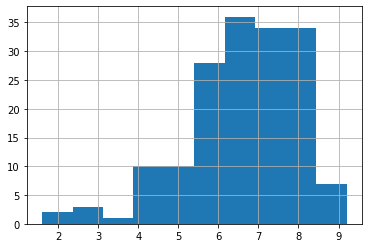

In [61]:
rating_XOne.hist();

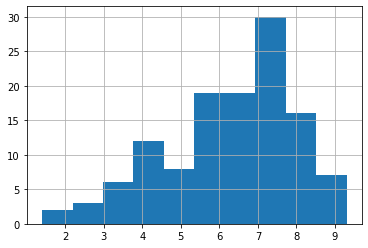

In [62]:
rating_PC.hist();

In [63]:
alpha = .05 # критический уровень статистической значимости(общепринятое пороговое значение)
results = st.ttest_ind(
    rating_XOne, 
    rating_PC)

display(results)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=1.6285882029651313, pvalue=0.10450507919348415)

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно 10%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

Таким образом, наши данные не противоречат гипотезе:  rating_XOne == rating_PC.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:

Н(0): rating_Action == rating_Sports   **Средние пользовательские рейтинги жанров Action и Sports одинаковые**

Н(1): rating_Action != rating_Sports   **Средние пользовательские рейтинги жанров Action и Sports разные**


In [64]:
rating_Action = data_actual.query('genre == "Action"')['user_score'].dropna()
rating_Sports = data_actual.query('genre == "Sports"')['user_score'].dropna()

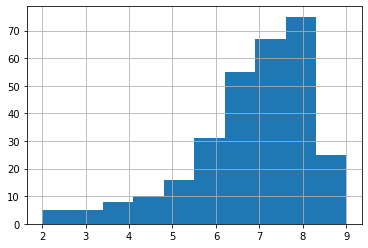

In [65]:
rating_Action.hist();

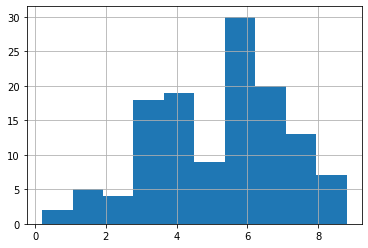

In [66]:
rating_Sports.hist();

In [67]:
alpha = .05 # критический уровень статистической значимости(общепринятое пороговое значение)
results = st.ttest_ind(
    rating_Action, 
    rating_Sports)

display(results)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=9.425173048948047, pvalue=2.8711147985105864e-19)

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


В данном случае средние статистически значимо отличаются друг от друга, вероятность случайно получить такую разницу меньше 5%. Так как наша гипотеза была: rating_Action == rating_Sports, то у нас  есть смысл принять решение об отвержении нулевой гипотезы. Это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Таким образом, в ходе исследования были выявлены следующие зкономерности, определяющие успешность игры:
- на данный момент на рынке лидируют 2 платформы: PS4 и XOne. Если смотреть в разрезе регионов, то такое лидерство характерно для Америки и Европы, в Японии же лидирующую позицию занимает платформа 3DS.
- самым прибыльным жанром игр являются Shooter, его медианные продажи в 2 раза превышают продажи следующего по популярности жанра компбютерных игр - Sports.
- на европейском и американском рынке показатели влияния рейтинга ESRB на продажи почти не отличаются от американских. Игры с рейтингом "M" и "Е" наиболее популярны. В Японии наиболее популярны игры с рейтингом «T». Но важно учитывать, что не во всех регионах используется именно эта американская система оценки возрастной цензуры. Чтобы иметь полную информацию, в будущем можно порекомендовать рассматривать рейтинги и от других организаций, например европейская PEGI, японская CERO. 
- линейная связь между продажами игр и отзывами критиков имеется, хоть и не слишком сильная. А вот отзывы пользователей не оказывают влияния на продажи.

После проверки гипотез можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также средние пользовательские рейтинги жанров Action и Sports разные. Но нужно отметить, что пользовательские рейтинги практически не оказывают влияния на решение о покупке игры.


